# QR Decomposition and Gram-Schmidt

Remember the normal equation:
    $$ \vec{c} = (A^TA)^{-1} A^T\vec{y}$$

The normal equation method of *fitting* a regression function has two issues:
* It can be computationally expensive to take the inverse of a matrix
* In some cases, $A^TA$ may not be *invertible* (https://mathworld.wolfram.com/MatrixInverse.html)

## QR decomposition

Instead, we can use what's called QR decomposition; we factor $A$ into an *orthogonal matrix* $Q$ and an *upper triangle matrix* $R$, ie $A = QR$, where $Q$ has the same shape as $A$ $(N, M+1)$ and $R$ has shape $(M+1, M+1)$.
* Orthogonal matrix: https://mathworld.wolfram.com/OrthogonalMatrix.html
* Upper triangle matrix: https://mathworld.wolfram.com/UpperTriangularMatrix.html

## Why does this help? 

Because orthogonal matrices have an interesting property: $$Q^TQ = I$$ which means $$Q^T = Q^{-1}$$

Let's rewrite the normal equation a little bit:
$$ A^TA \vec{c} = A^T \vec{y} $$
Substituting in QR we get:
$$ (QR)^T(QR) \vec{c} = (QR)^T \vec{y} $$
which (remember $(XY)^T = Y^TX^T$) is equivalent to:
$$  R^TQ^TQR \vec{c} = R^TQ^T \vec{y}  $$
which (remember $Q^TQ = I$) is equivalent to:
$$  R^TR \vec{c} = R^TQ^T \vec{y}  $$
which (multiply both sides by $(R^T)^{-1}$) is equivalent to:
$$  R \vec{c} = Q^T \vec{y}  $$


Okay, great. No more matrix inversion. __But__ how do we figure out what $Q$ and $R$ are? 

## Figuring out R from Q and A

We know $A$. If we can get $Q$, then:
    $$ A = QR $$
so:
    $$ Q^{-1}A = Q^{-1}QR $$
then (remember $Q^{-1}Q = I$):
        $$  Q^{-1}A = R   $$
and (remember $Q^{-1} = Q^T$):
        $$  Q^TA = R   $$
        
        
Let's sanity check if the matrix multiplies are possible! If the shape the data has $N$ data points (rows) and $M$ independent variables, then the shape of $A$ is $(N, M+1)$, and the shape of $Q$ is $(N, M+1)$ so the shape of $Q^T$ is $(??, ??)$ which means the shape of $R$ is $(M+1, M+1)$.

## Figuring out Q

To calculate $Q$ we use an algorithm called *Gram-Schmidt decomposition*. The idea is to make the column vectors orthogonal to each other by iteratively subtracting out "overlapping" components via projection onto the previous column vectors; that is:
* We first set the orthogonal for the $0$th column vector in $A$, $\vec{a_0}$, to be $\vec{v_0} = \vec{a_0}$ (nothing to compare to!). And we normalize to length 1 by dividing by the length (norm) of $\vec{v_0}$, to get $\vec{q_0}$ in $Q$.
* Then, we set $\vec{v_1} = \vec{a_1} - projection_\vec{v_0}(\vec{a_1})$. And then $\vec{q_1}$ = $\frac{\vec{v_1}}{| \vec{v_1} |}$.
* Then, we set $\vec{v_2} = \vec{a_2} - projection_\vec{v_0}(\vec{a_2}) - projection_\vec{v_1}(\vec{a_2})$. And then $\vec{q_2}$ = $\frac{\vec{v_2}}{| \vec{v_2} |}$.
* And in general, $\vec{v_i} = \vec{a_i} - \sum_{j=0}^{i-1} projection_\vec{v_j}(\vec{a_i})$. And then $\vec{q_i}$ = $\frac{\vec{v_i}}{| \vec{v_i} |}$.

What is this *projection*? We calculate it using $(\vec{a_i} \cdot \vec{q_j})\vec{q_j}$.

Here is an illustration (from Wikipedia) of projecting $\vec{a_2}$ ($\vec{u_2}$) onto $\vec{a_1}$ ($\vec{u_1}$):
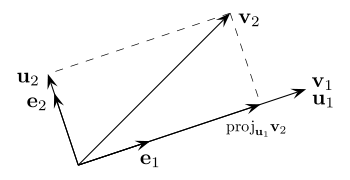

## Gram-Schmidt algorithm

Let's get a little more pseudocodish:

In [63]:
import numpy as np

A = np.array([[1, 0, 0], [1, 0, 1], [1, 1, 0], [1, 1, 1]])

# define the projection of u onto v to be the multiplication of the elements of u by the Gram-Schmidt coefficient of u and v (via broadcasting)
def projection(u, v):
    return np.dot(v, u)*v

# now define the Gram-Schmidt algorithm
def gram_schmidt(A):
    # Initialize Q to a matrix of shape (??, ??)
    Q = np.zeros(A.shape)
    # For the ith column in A from the left to the right
    for i in range(A.shape[1]):
        # Set that ith column of Q to be the ith column of A
        Q[:, i] = A[:, i].copy()
        # For the jth column in A where j <= i-1
        for j in range(i):
            print(Q[:, i])
            # Subtract the projection from the ith column of Q
            Q[:, i] -= projection(A[:, i], Q[:, j])
        # Divide the ith column of Q by its norm, ie the square root of the dot product of the ith column of Q by itself
        Q[:, i] = Q[:, i] / np.sqrt(np.dot(Q[:, i], Q[:, i]))
    return Q

print(gram_schmidt(np.array(A)))


3
[[-0.5 -0.5  0.5]
 [-0.5 -0.5 -0.5]
 [-0.5  0.5  0.5]
 [-0.5  0.5 -0.5]]
[0. 0. 1. 1.]
[0. 1. 0. 1.]
[-0.5  0.5 -0.5  0.5]
[[ 0.5 -0.5 -0.5]
 [ 0.5 -0.5  0.5]
 [ 0.5  0.5 -0.5]
 [ 0.5  0.5  0.5]]


Sometimes this won't work. It won't work if the matrix $A$ does not have linearly independent columns. In this case, you'll get a divide by 0 or other error. Don't worry! We can *estimate* the *fit* using machine learning. But we'll get to that later in the semester.

One more note. Some of you may be thinking that 
$$  R \vec{c} = Q^T \vec{y}  $$
is no better than we started because in order to solve for $\vec{c}$ we need to invert $R$. However, $R$ is a triangular matrix. So we can use back substitution to solve. In project 3, you can use scipy.linalg.solve_triangular.

## Resources

* https://www.statlect.com/matrix-algebra/Gram-Schmidt-process
* http://mlwiki.org/index.php/Gram-Schmidt_Process
* https://www.cs.auckland.ac.nz/courses/compsci369s1c/lectures/DW-notes/lecture10.pdf